In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import h5py
import os

In [6]:
model_folder_name = '13_cccfff'
batch_size = 10000

meta_loading_folder = '/fhgfs/users/jbehnken/make_Data/architectures/' + model_folder_name
meta_loading_path = meta_loading_folder + '/' + model_folder_name.split('_')[-1] + '.meta'

In [7]:
def batchYielder(name):
    with h5py.File('/fhgfs/users/jbehnken/make_Data/MC_preprocessed_images.h5', 'r') as hdf:
        items = list(hdf.items())[0][1].shape[0]
        i = 0

        while (i+1)*batch_size < items/20: # 160 factor to not process everything
            images = np.array(hdf[name][ i*batch_size:(i+1)*batch_size ])

            i += 1
            print(i)
            yield images

In [8]:
gpu_config = tf.GPUOptions(allow_growth=True, per_process_gpu_memory_fraction=0.2)
session_conf = tf.ConfigProto(gpu_options=gpu_config, intra_op_parallelism_threads=18, inter_op_parallelism_threads=18)


with tf.Session(config=session_conf) as sess:
    saver = tf.train.import_meta_graph(meta_loading_path)    
    saver.restore(sess, tf.train.latest_checkpoint(meta_loading_folder))
    
    graph = tf.get_default_graph()
    
    #print(sess.graph.get_operations())
    
    try:
        conv2d_1_weights = graph.get_tensor_by_name("conv2d_1/W:0")
        conv2d_1_biases = graph.get_tensor_by_name("conv2d_1/B:0")
        print('Conv2d_1', conv2d_1_weights.shape)
    except: pass
    
    try:
        conv2d_2_weights = graph.get_tensor_by_name("conv2d_2/W:0")
        conv2d_2_biases = graph.get_tensor_by_name("conv2d_2/B:0")
        print('Conv2d_2', conv2d_2_weights.shape)
    except: pass
    
    try:
        conv2d_3_weights = graph.get_tensor_by_name("conv2d_3/W:0")
        conv2d_3_biases = graph.get_tensor_by_name("conv2d_3/B:0")
        print('Conv2d_3', conv2d_3_weights.shape)
    except: pass
    
    try:
        conv2d_4_weights = graph.get_tensor_by_name("conv2d_4/W:0")
        conv2d_4_biases = graph.get_tensor_by_name("conv2d_4/B:0")
        print('Conv2d_4', conv2d_4_weights.shape)
    except: pass
    
    try:
        conv2d_5_weights = graph.get_tensor_by_name("conv2d_5/W:0")
        conv2d_5_biases = graph.get_tensor_by_name("conv2d_5/B:0")
        print('Conv2d_5', conv2d_5_weights.shape)
    except: pass
    
    try:
        conv2d_6_weights = graph.get_tensor_by_name("conv2d_6/W:0")
        conv2d_6_biases = graph.get_tensor_by_name("conv2d_6/B:0")
        print('Conv2d_6', conv2d_6_weights.shape)
    except: pass
    
    try:
        fc_1_weights = graph.get_tensor_by_name("fc_1/W:0")
        fc_1_biases = graph.get_tensor_by_name("fc_1/B:0")
        print('Fc_1', fc_1_weights.shape)
    except: pass
    
    try:
        fc_2_weights = graph.get_tensor_by_name("fc_2/W:0")
        fc_2_biases = graph.get_tensor_by_name("fc_2/B:0")
        print('Fc_2', fc_2_weights.shape)
    except: pass
    
    try:
        fc_3_weights = graph.get_tensor_by_name("fc_3/W:0")
        fc_3_biases = graph.get_tensor_by_name("fc_3/B:0")
        print('Fc_3', fc_3_weights.shape)
    except: pass
    
    try:
        fc_4_weights = graph.get_tensor_by_name("fc_4/W:0")
        fc_4_biases = graph.get_tensor_by_name("fc_4/B:0")
        print('Fc_4', fc_4_weights.shape)
    except: pass
    
    try:
        fc_5_weights = graph.get_tensor_by_name("fc_5/W:0")
        fc_5_biases = graph.get_tensor_by_name("fc_5/B:0")
        print('Fc_5', fc_5_weights.shape)
    except: pass
    print("Model restored.")
    
    
    #tf_prediction_dataset = tf.constant(images, name='prediction_data')
    tf_prediction_dataset = tf.placeholder(tf.float32, shape=(batch_size, 46, 45, 1), name='training_data')        

    g_preds_1 = []
    g_preds_2 = []
    h_preds_1 = []
    h_preds_2 = []
    #sess.run(tf.global_variables_initializer())
    
    name = model_folder_name.split('_')[-1]
    for images in batchYielder('Gamma'):
        feed_dict = {tf_prediction_dataset : images}
        
        if name=='cff':
            with tf.name_scope('prediction_cff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')        
                shape = pool_1.get_shape().as_list()
                reshape = tf.reshape(pool_1, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_cff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_cff, feed_dict=feed_dict)
            
        elif name=='ccff':
            with tf.name_scope('prediction_ccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_2.get_shape().as_list()
                reshape = tf.reshape(pool_2, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_ccff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_ccff, feed_dict=feed_dict)
        
        elif name=='cccff':
            with tf.name_scope('prediction_cccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_3 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_2, conv2d_3_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_3_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_3.get_shape().as_list()
                reshape = tf.reshape(pool_3, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_cccff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_cccff, feed_dict=feed_dict)
        
        elif name=='cccfff':
            with tf.name_scope('prediction_cccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_3 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_2, conv2d_3_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_3_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_3.get_shape().as_list()
                reshape = tf.reshape(pool_3, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                hidden = tf.nn.relu(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
                prediction_cccfff = tf.nn.softmax(tf.matmul(hidden, fc_3_weights) + fc_3_biases)
            pred = sess.run(prediction_cccfff, feed_dict=feed_dict)
        
        else:
            print('else', name)
            break        

        g_preds_1.extend(pred[:,0])
        g_preds_2.extend(pred[:,1])
        
        
        
        
    for images in batchYielder('Hadron'):
        feed_dict = {tf_prediction_dataset : images}
        
        if name=='cff':
            with tf.name_scope('prediction_cff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')        
                shape = pool_1.get_shape().as_list()
                reshape = tf.reshape(pool_1, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_cff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_cff, feed_dict=feed_dict)
            
        elif name=='ccff':
            with tf.name_scope('prediction_ccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_2.get_shape().as_list()
                reshape = tf.reshape(pool_2, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_ccff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_ccff, feed_dict=feed_dict)
        
        elif name=='cccff':
            with tf.name_scope('prediction_cccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_3 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_2, conv2d_3_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_3_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_3.get_shape().as_list()
                reshape = tf.reshape(pool_3, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                prediction_cccff = tf.nn.softmax(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
            pred = sess.run(prediction_cccff, feed_dict=feed_dict)
        
        elif name=='cccfff':
            with tf.name_scope('prediction_cccff'):
                pool_1 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(tf_prediction_dataset, conv2d_1_weights, [1, 1, 1, 1], padding='SAME') + conv2d_1_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_2 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_1, conv2d_2_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_2_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                pool_3 = tf.nn.max_pool(tf.nn.relu(tf.nn.conv2d(pool_2, conv2d_3_weights, [1, 1, 1, 1], padding='SAME')  + conv2d_3_biases), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
                shape = pool_3.get_shape().as_list()
                reshape = tf.reshape(pool_3, [shape[0], shape[1] * shape[2] * shape[3]])
                hidden = tf.nn.relu(tf.matmul(reshape, fc_1_weights) + fc_1_biases)
                hidden = tf.nn.relu(tf.matmul(hidden, fc_2_weights) + fc_2_biases)
                prediction_cccfff = tf.nn.softmax(tf.matmul(hidden, fc_3_weights) + fc_3_biases)
            pred = sess.run(prediction_cccfff, feed_dict=feed_dict)
        
        else:
            print('else', name)
            break        

        h_preds_1.extend(pred[:,0])
        h_preds_2.extend(pred[:,1])

NotFoundError: Key conv2d_5/W not found in checkpoint
	 [[Node: save/RestoreV2_27 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_27/tensor_names, save/RestoreV2_27/shape_and_slices)]]
	 [[Node: save/RestoreV2_35/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_58_save/RestoreV2_35", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]

Caused by op 'save/RestoreV2_27', defined at:
  File "/opt/anaconda3/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/opt/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/opt/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/opt/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/opt/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-4b4357928ce1>", line 6, in <module>
    saver = tf.train.import_meta_graph(meta_loading_path)
  File "/opt/anaconda3/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1566, in import_meta_graph
    **kwargs)
  File "/opt/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/meta_graph.py", line 498, in import_scoped_meta_graph
    producer_op_list=producer_op_list)
  File "/opt/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/importer.py", line 288, in import_graph_def
    op_def=op_def)
  File "/opt/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2327, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/opt/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1226, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Key conv2d_5/W not found in checkpoint
	 [[Node: save/RestoreV2_27 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save/Const_0, save/RestoreV2_27/tensor_names, save/RestoreV2_27/shape_and_slices)]]
	 [[Node: save/RestoreV2_35/_29 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/gpu:0", send_device="/job:localhost/replica:0/task:0/cpu:0", send_device_incarnation=1, tensor_name="edge_58_save/RestoreV2_35", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/gpu:0"]()]]


In [ ]:
g_data = list(zip(g_preds_1, g_preds_2))
h_data = list(zip(h_preds_1, h_preds_2))
g_df = pd.DataFrame(g_data, columns=['Hadron', 'Gamma'])
h_df = pd.DataFrame(h_data, columns=['Hadron', 'Gamma'])
#df.to_csv(prediction_save_path, index=False)

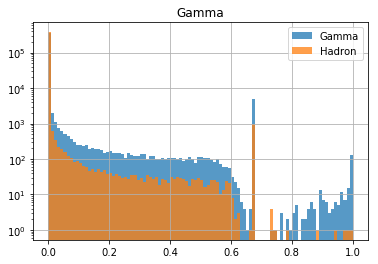

In [6]:
import matplotlib.pyplot as plt
bins = np.arange(0,1.01,0.01)
ax = g_df.hist(['Gamma'], bins=bins, alpha=0.75)
h_df.hist(['Gamma'], bins=bins, ax=ax, alpha=0.75)
plt.yscale('log')
plt.legend(['Gamma', 'Hadron'])
plt.show()

In [7]:
print(len(g_data))
print(len(h_data))

380000
380000
